# Tarea 1: Programación dinámica

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from grid_world import GridWorld
from utils import display_policy
from utils import display_value_function


# Parte I

# 1.

***Describa el MDP que define al problema (espacio de estados, espacio de acciones, función de recompensa y función de transición de estados).***

* Espacio de estados:
* Espacio de acciones:
* Función de recompensa:
* Función de transición de estados:

# 2.

***Programe el algoritmo “policy iteration” para resolver el problema propuesto. Para ello complete
los métodos policy evaluation y policy improvement que se encuentran en el archivo
policy iteration.py***

In [32]:
action_dictionary={"0":"left","1":"right","2":"up","3":"down"}
action_dictionary

{'0': 'left', '1': 'right', '2': 'up', '3': 'down'}

In [36]:
def choose_with_probability(a, b, p):
    if np.random.uniform() < p:
        return a
    else:
        return b

In [76]:
def sum_array(arreglo1, arreglo2):
    resultado = ()
    for elemento1, elemento2 in zip(arreglo1, arreglo2):
        suma = elemento1 + elemento2
        resultado += (suma,)
    return resultado

In [52]:
def state_transition_function(s,a,p_random,reward_grid):

    # Se guarda estado inicial
    initial_state=s

    # Según la acción que se ejecuta, se definen los dos potenciales movimientos efectivos que podrian suceder (verticales a la acción original)

    # Acciones 0 o 1
    if (a==0) or (a==1):

        x=2
        y=3

        # Elección del movimiento x o y con probabilidad p_random
        final_action=choose_with_probability(x,y,p_random)

        # Según la acción final, se define el delta state que permite obtener el nuevo potencial estado
        delta_state=(0,1) if  final_action==2  else  (0,-1)

        # Se obtiene el nuevo potencial estado mediante suma vectorial
        potential_new_state=sum_array(initial_state, delta_state)

        # Permanecemos en el estado inicial si es que no se puede recorrer dicho estado sino, vamos al nuevo estado
        final_state=initial_state if np.isnan(reward_grid[potential_new_state]) else potential_new_state
        
        return final_state,reward_grid[final_state]

    else: # Acciones 2 o 3

        # Código analogo
        x=0
        y=1
        final_action=choose_with_probability(x,y,p_random)
        delta_state=(-1,0) if final_action==0 else (1,0) 
        potential_new_state=sum_array(initial_state, delta_state)
        final_state=initial_state if np.isnan(reward_grid[potential_new_state]) else potential_new_state

        return final_state,reward_grid[final_state]

In [6]:
class PolicyIterator():
    
    def __init__(self, reward_grid, wall_value, cell_value, terminal_value):

        self._reward_grid = reward_grid
        self._wall_value = wall_value
        self._cell_value = cell_value
        self._terminal_value = terminal_value

        self._value_function = np.zeros(self._reward_grid.shape)
        self._value_function *= self._reward_grid
        self._policy = self._value_function.copy()


    def _policy_evaluation(self, nb_iters, p_dir, gamma, v_thresh):
        # Policy evaluation
        # Code your algorithm here (P1-2) (you can add auxiliary functions if needed)
        #policy_probs=np.full((5,5,4),0.25)
        prob=0.25
        p_random    = 1 - p_dir
        #p_side
        value_rows, value_cols = self._value_function.shape

        delta=float("inf")
        for _ in range(nb_iters):

            # Indexes for skipping external walls (you may change them)
            for j in range(1, value_rows - 1):
                for i in range(1, value_cols - 1):
                    
                    old_value=self._value_function[(j,i)]
                    new_value=0

                    for action in range(4):

                        next_state,reward=state_transition_function((j,i),action,p_random,self._reward_grid)
                        
                        new_value+=prob*(reward+gamma*self._value_function[next_state])

                        delta=max(delta,abs(old_value,new_value))
                    
            if delta < v_thresh:
                break
            
                    
    def _policy_improvement(self, nb_iters, p_dir, gamma):
        # Policy improvement
        # Code your algorithm here (P1-2) (you can add auxiliary functions if needed)
        
        p_random    = 1 - p_dir
        value_rows, value_cols = self._value_function.shape

        old_policy = self._policy.copy()
        stable_policy = True

        for j in range(1, value_rows - 1):
            for i in range(1, value_cols - 1):
                
                """if something:
                    stable_policy = False
                """
        
        return stable_policy


    def run_policy_iteration(self, p_dir, nb_iters, gamma, v_thresh):
        stable_policy = False

        while not stable_policy:
            self._policy_evaluation(nb_iters, p_dir, gamma, v_thresh)
            stable_policy = self._policy_improvement(nb_iters, p_dir, gamma)        
        

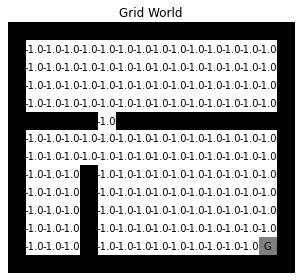

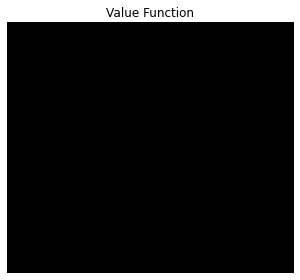

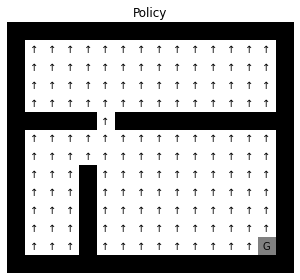

In [7]:

    
world = GridWorld(height=14, width=16)
policy_iterator = PolicyIterator(reward_grid=world._rewards,
                                    wall_value=None,
                                    cell_value=-1,
                                    terminal_value=0)

# Default parameters for P1-3 (change them for P2-3)
policy_iterator.run_policy_iteration(p_dir=0.8,
                                        nb_iters=1000,
                                        gamma=0.9,
                                        v_thresh=0.0001)

world.display()

display_value_function(policy_iterator._value_function)

display_policy(world._grid,
                policy_iterator._reward_grid,
                policy_iterator._policy)

plt.show()

# 3.

***Sin modificar las funciones auxiliares proporcionadas en el código base, muestre la función de valor
encontrada, junto a la política aprendida, y el núimero de iteraciones sobre la función de valor que fue
necesario realizar.***

-----------

In [54]:
class GridWorld:
    
    def __init__(self, height, width):
        
        # World parameters
        self._height     =   height
        self._width      =   width
        self._grid       =   np.ones((self._height, self._width))
        self._rewards    = - np.ones((self._height, self._width))

        self._construct_world(self._grid, 0, 1, 0.5)
        self._construct_world(self._rewards, np.nan, -1, 0)


    # Private methods
    def _construct_world(self, grid, wall_value, cell_value, terminal_value):
        
        # External Walls
        grid[0, 0:]                 = wall_value
        grid[self._height - 1, 0:]  = wall_value
        grid[0:, self._width - 1]   = wall_value
        grid[0:, 0]                 = wall_value
        
        # Internal Walls
        grid[5, 0:]                 = wall_value
        grid[5, 5]                  = cell_value
        grid[8:, 4]                 = wall_value
        
        # Terminal state
        grid[self._height - 2, self._width - 2] = terminal_value


    # Public methods
    def display(self):
        fig, ax = plt.subplots()

        for j in range(self._height):
            for i in range(self._width):
                if self._rewards[j, i] == 0:
                    ax.text(i, j, 'G', ha='center', va='center')
                elif self._rewards[j , i] != None:
                    ax.text(i, j, self._rewards[j, i], ha='center', va='center')

        ax.imshow(self._grid, cmap='gray')
        
        plt.title('Grid World')
        plt.axis('off')
        fig.tight_layout()

        plt.savefig('world.pdf')


In [61]:
np.isnan(world._rewards[0][0])

False

In [55]:
world = GridWorld(height=14, width=16)

In [23]:
policy_probs=np.full((5,5,4),0.25)
policy_probs

array([[[0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25]],

       [[0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25]],

       [[0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25]],

       [[0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25]],

       [[0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25]]])

In [27]:
# toma como un input un estado y entrega las probabilidades de tomar cada acción en ese estado
def policy(state):

    return policy_probs[state]

In [28]:
# Estado (4,4)
policy((4,4))

array([0.25, 0.25, 0.25, 0.25])

In [29]:
# Representa el valor de todos los estados
state_values=np.zeros(shape=(14,16))
state_values

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [ ]:
def policy_evaluation(policy_probs,state_values,theta=1e-6,gamma=0.99):
    delta=float("inf")

    while delta >theta:
        delta=0

        for row in range(14):
            for col in range(16):
                
                old_value=state_values[(row,col)]
                new_value=0
                action_probabilities=policy_probs[(row,col)]

                for action,prob in enumerate(action_probabilities):
                    next_state,reward=simulate_step((row,col),action)
                    new_value+=prob*(reward+gamma*state_values[next_state])
                state_values[(row,col)]=new_value

                delta=max(delta,abs(old_value,new_value))


 


In [30]:
def policy_improvement(policy_probs,state_values,gamma=0.99):
    policy_stable=True
    for row in range(14):
            for col in range(16):
                old_action=policy_probs[(row,col)].argmax()
                new_action=None
                max_qsa=float("-inf") 

                for action in range(4):
                    next_sate,reward,_,_=simulated_step((row,col),action)
                    qsa=reward+gamma*state_values[next_sate]

                    if qsa>max_qsa:
                        new_action=action
                        max_qsa=qsa
                    action_probs=np.zeros(4)
                    action_probs[new_action]=1
                    policy_probs[(row,col)]=action_probs

                    if new_action!=old_action:
                         policy_stable=False
    
    return policy_stable
                


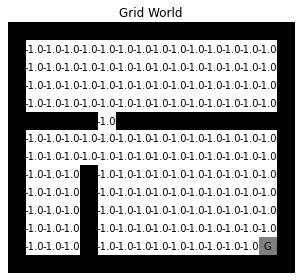

In [15]:
def policy_iteration(policy_probs,state_values,theta=0.001,gamma=0.99):
    policy_stable=False
    while not policy_stable:
        policy_evaluation(policy_probs,state_values,theta,gamma)
        plot_values(state_values,frame)
        policy_stable=policy_improvement(policy_probs,state_values,gamma)
        plot_policy(policy_probs,frame)